<a href="https://colab.research.google.com/github/KrankVegan/KrankVegan/blob/main/Proyecto_analitica_Final_BACKUP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto

**Notas:**


*   La reduccion de dimensiones va antes de la regresion
*   Quitar atributos muy parecidos para la regresion
*   probando al menos dos algoritmos clasicos = dos versiones de regresion
*   El modelo de aprendizaje profundo debe dar parecido a las regresiones



**Base de datos utilizada**:
 [1982-2022 NBA Player Statistics with MVP Votes - Kaggle]https://www.kaggle.com/datasets/robertsunderhaft/nba-player-season-statistics-with-mvp-win-share).

**Glosario**:

https://www.basketball-reference.com/about/glossary.html

In [ ]:
#cargar datos desde drive acceso libre
FILEID = "1_QThMVrpLT7dM7TFPfHWfcDKy1DOJ0YT"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir


--2022-11-29 16:37:32--  https://docs.google.com/uc?export=download&confirm=&id=1_QThMVrpLT7dM7TFPfHWfcDKy1DOJ0YT
Resolving docs.google.com (docs.google.com)... 108.177.12.102, 108.177.12.100, 108.177.12.113, ...
Connecting to docs.google.com (docs.google.com)|108.177.12.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pspf04ht0bge13fet1n35j86jd0vuc00/1669739850000/09208623971279381051/*/1_QThMVrpLT7dM7TFPfHWfcDKy1DOJ0YT?e=download&uuid=79d2fe0c-adbc-427c-9550-5c4acdc82288 [following]
--2022-11-29 16:37:32--  https://doc-08-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pspf04ht0bge13fet1n35j86jd0vuc00/1669739850000/09208623971279381051/*/1_QThMVrpLT7dM7TFPfHWfcDKy1DOJ0YT?e=download&uuid=79d2fe0c-adbc-427c-9550-5c4acdc82288
Resolving doc-08-a0-docs.googleusercontent.com (doc-08-a0-docs.googleusercontent.com)... 173.194.212.132, 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#librerias para proceso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline

%matplotlib inline
csv_path = 'NBA_Dataset.csv' #directorio de la base de datos en disco de colaboratory según archivo cargado

Xdata = pd.read_csv(csv_path)#leer archivo csv

col_drop = ['player',"fg_per_g","fga_per_g","fg2_per_g","fg2a_per_g","ft_per_g","ws","ows"] #variables a descartar - variables que son demasiada parecidas al output o no son relevantes
Xdata.drop(columns = col_drop, inplace = True)
Xdata.head()

season pos  age team_id   g  gs  mp_per_g  fg_pct  fg3_per_g  fg3a_per_g  \
0    1982   C   34     LAL  76  76      35.2   0.579        0.0         0.0   
1    1982   C   27     PHO  79  75      30.3   0.494        0.0         0.0   
2    1982  SF   22     DAL  51  20      28.8   0.465        0.5         1.4   
3    1982  SG   22     BOS  53   1      10.6   0.357        0.1         0.3   
4    1982  PG   33     BOS  68  51      31.9   0.472        0.1         0.2   

   ...  dws  ws_per_48  obpm  dbpm  bpm  vorp  award_share   mov  mov_adj  \
0  ...  3.9      0.192   3.8   1.2  5.0   4.7        0.045  4.87     4.37   
1  ...  4.7      0.144   1.4   2.2  3.6   3.4        0.000  3.45     3.05   
2  ...  0.8      0.061   2.3  -1.6  0.7   1.0        0.000 -4.43    -4.48   
3  ...  0.8      0.042  -3.7   1.0 -2.7  -0.1        0.000  6.38     6.35   
4  ...  1.8      0.115   1.4  -1.3  0.1   1.1        0.000  6.38     6.35   

   win_loss_pct  
0         0.695  
1         0.561  
2         0.341  
3         0.768  
4         0.768  

[5 rows x 47 columns]

In [ ]:
Xdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17697 entries, 0 to 17696
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            17697 non-null  int64  
 1   pos               17697 non-null  object 
 2   age               17697 non-null  int64  
 3   team_id           17697 non-null  object 
 4   g                 17697 non-null  int64  
 5   gs                17697 non-null  int64  
 6   mp_per_g          17697 non-null  float64
 7   fg_pct            17634 non-null  float64
 8   fg3_per_g         17697 non-null  float64
 9   fg3a_per_g        17697 non-null  float64
 10  fg3_pct           15074 non-null  float64
 11  fg2_pct           17591 non-null  float64
 12  efg_pct           17634 non-null  float64
 13  fta_per_g         17697 non-null  float64
 14  ft_pct            17121 non-null  float64
 15  orb_per_g         17697 non-null  float64
 16  drb_per_g         17697 non-null  float6

Nuestro Ouput sera el atributo o columna pts_per_g o puntos por partido.




In [ ]:
# Partición entrenamiento y evaluación
# Tamaño Xtrain 70%, Tamaño Xtest 30%

Xtrain, Xtest = train_test_split(Xdata,test_size=0.3)
col_sal       = "pts_per_g" # points  per game
ytrain        = Xtrain[col_sal]
ytest         = Xtest[col_sal]
Xtrain.drop(columns=col_sal,inplace=True)
Xtest.drop(columns=col_sal,inplace=True)


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")#se utiliza estimador de moda
ytrain = imputer.fit_transform(pd.DataFrame(ytrain)).reshape(-1)#ajuste sobre la salida
ytest = imputer.transform(pd.DataFrame(ytest)).reshape(-1)#evaluar sobre datos de test

print(ytrain.shape, ytest.shape)

(12387,) (5310,)


In [ ]:
pd.DataFrame(ytest).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5310 entries, 0 to 5309
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5310 non-null   float64
dtypes: float64(1)
memory usage: 41.6 KB


In [ ]:
ytrain[:5]
len(ytrain)

12387

**Categorizacion de columnas**

In [ ]:
cat = ["team_id", "pos"]#variables a codificar OrdinalEncoder y OneHotEncoder
items = []
for i in cat:
    items += [list(Xdata[i].value_counts().index)]
cat_usr = dict(zip(cat, items))#se crean diccionarios con las variables y sus posibles valores

In [ ]:
Xdata['team_id'].value_counts()

TOT    1954
ATL     578
IND     577
SAS     575
LAL     574
UTA     567
GSW     566
BOS     555
CLE     554
HOU     554
DAL     552
PHO     551
MIL     549
DET     549
LAC     548
POR     548
PHI     547
NYK     547
CHI     544
DEN     543
MIA     484
SAC     481
ORL     457
MIN     450
NJN     415
TOR     374
SEA     358
WAS     355
MEM     305
WSB     227
OKC     213
CHH     181
BRK     160
NOP     137
CHA     133
NOH     121
CHO     119
VAN      79
KCK      48
SDC      40
NOK      28
Name: team_id, dtype: int64

In [ ]:
cat_usr.keys()

dict_keys(['team_id', 'pos'])

In [ ]:
cat_usr['pos']

['PF',
 'C',
 'SG',
 'PG',
 'SF',
 'SF-SG',
 'PG-SG',
 'SG-SF',
 'C-PF',
 'PF-C',
 'SG-PG',
 'PF-SF',
 'SF-PF',
 'SG-PF',
 'PG-SF',
 'SF-C',
 'SG-PG-SF']

In [ ]:
##transformer custom
from sklearn.base import BaseEstimator, TransformerMixin #objetos básicos para herencia de clase

class mypre_nba(BaseEstimator,TransformerMixin):
    #inicializacion de clase y varaibles
    def __init__(self, cat_usr): #constructor clase
        self.cat_usr = cat_usr #lista de atributos categoricos

    def fit(self,X, *_):#función de ajuste -> *_ para indicar que puede recibir más entradas en el pipeline
        Xi = X.copy() #copiar dataset para no reemplazar original
        self.imputer_num = SimpleImputer(strategy="most_frequent") #crear imputador tipo moda
        self.a = Xi.columns[np.sum(Xi.isna())> 0] #encontrar columnas con datos faltantes
        self.imputer_num.fit(Xi[self.a]) # ajustar imputador
        Xi[self.a] = self.imputer_num.transform(Xi[self.a]) #evaluar datos con el imputador


        Xi['season'] = Xi['season'].astype('float64')

        cat = [] #codificar variables categoricas con ordinal encoder
        for i in self.cat_usr.keys():
            cat = cat + [[*self.cat_usr.get(i)]]
        self.col_cat_usr = OrdinalEncoder(categories=cat) # OneHotEncoder(categories=cat,sparse=False)
        Xi[[*self.cat_usr.keys()]] =self.col_cat_usr.fit_transform(Xi[[*self.cat_usr.keys()]])
        #si utilizar OneHotEncoder debe concatenar las columnas resultantes -> ver cuaderno guia lado a lado

        return self

    def transform(self, X, *_):#funcion transformador-> pensando en datos nuevos
        Xi = X.copy()
        Xi[self.a] = self.imputer_num.transform(Xi[self.a])
        ##
        Xi['season'] = Xi['season'].astype('float64')

        Xi[[*self.cat_usr.keys()]] =self.col_cat_usr.transform(Xi[[*self.cat_usr.keys()]])
        return Xi

    def fit_transform(self,X,*_):#ajustar y transformar en cascada
        self.fit(X)
        return self.transform(X)

In [ ]:
mypre = mypre_nba(cat_usr = cat_usr)
Xtrain_pre = mypre.fit_transform(Xtrain)
TotalX = mypre.fit_transform(Xdata)

In [ ]:
Xtest_pre = mypre.transform(Xtest) #no se puede fit solo transform-> parámetros ajustados sobre Xtrain

In [ ]:
Xtrain_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12387 entries, 8689 to 8961
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            12387 non-null  float64
 1   pos               12387 non-null  float64
 2   age               12387 non-null  int64  
 3   team_id           12387 non-null  float64
 4   g                 12387 non-null  int64  
 5   gs                12387 non-null  int64  
 6   mp_per_g          12387 non-null  float64
 7   fg_pct            12387 non-null  float64
 8   fg3_per_g         12387 non-null  float64
 9   fg3a_per_g        12387 non-null  float64
 10  fg3_pct           12387 non-null  float64
 11  fg2_pct           12387 non-null  float64
 12  efg_pct           12387 non-null  float64
 13  fta_per_g         12387 non-null  float64
 14  ft_pct            12387 non-null  float64
 15  orb_per_g         12387 non-null  float64
 16  drb_per_g         12387 non-null  floa

**Reduccion de Dimensiones**:
El siguiente código calcula PCA sin reducir la dimensionalidad, luego calcula el número mínimo de dimensiones requeridas para preservar el 95% de la variación del conjunto de entrenamiento (nuestra variable Xtrain tiene 51 dimensiones).

In [ ]:
import scipy.stats as stats
totalXscore = stats.zscore(TotalX)
zscores_X = stats.zscore(Xtrain_pre)#se normaliza con z score nuestro conjunto de datos X
zscores_y = stats.zscore(ytrain)#se normaliza con z score nuestro conjunto de datos y

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca       = PCA(n_components=0.4)
X_reduced = pca.fit_transform(zscores_X)
Y2D = X_reduced.copy()
print("Para mantenerse el 40% de la varianza del conjunto de entrenamiento se necesita",pca.n_components_,"dimensiones")

Para mantenerse el 40% de la varianza del conjunto de entrenamiento se necesita 2 dimensiones


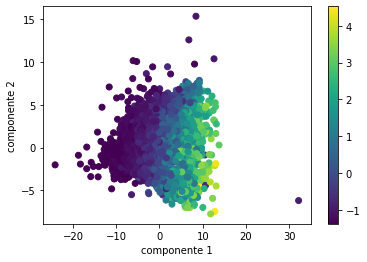

In [ ]:
plt.scatter(Y2D[:,0],Y2D[:,1],c=zscores_y,cmap='viridis')#Probara TSNE a ver si da mejor
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.colorbar()
plt.show()

Visualizacon con t-sne

Sacado de: https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne_x_train = Xtrain_pre
tsne_y_train = ytrain

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=42)
z = tsne.fit_transform(tsne_x_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12387 samples in 0.001s...
[t-SNE] Computed neighbors for 12387 samples in 7.707s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12387
[t-SNE] Computed conditional probabilities for sample 2000 / 12387
[t-SNE] Computed conditional probabilities for sample 3000 / 12387
[t-SNE] Computed conditional probabilities for sample 4000 / 12387
[t-SNE] Computed conditional probabilities for sample 5000 / 12387
[t-SNE] Computed conditional probabilities for sample 6000 / 12387
[t-SNE] Computed conditional probabilities for sample 7000 / 12387
[t-SNE] Computed conditional probabilities for sample 8000 / 12387
[t-SNE] Computed conditional probabilities for sample 9000 / 12387
[t-SNE] Computed conditional probabilities for sample 10000 / 12387
[t-SNE] Computed conditional probabilities for sample 11000 / 12387
[t-SNE] Computed conditional probabilities for sample 12000 / 12387
[t-SNE] Computed conditional probabilities for sam

In [ ]:
import seaborn as sns

[Text(0.5, 1.0, 'data T-SNE projection')]

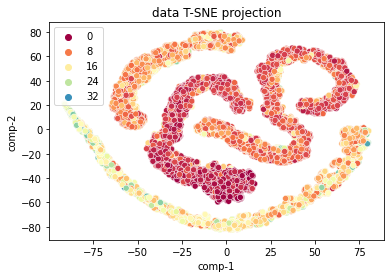

In [ ]:
df = pd.DataFrame()
df["y"] = tsne_y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("Spectral", as_cmap=True),
                data=df).set(title="data T-SNE projection")

Lo cual lo anterior tiene sentido si vemos el histograma de la columna "pts_per_g"

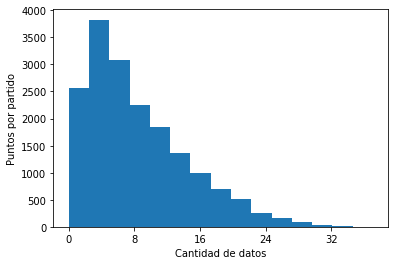

In [ ]:
col_salien = Xdata["pts_per_g"]
fig,ax = plt.subplots()
ax.hist(col_salien,label="Distribucion Points per game",bins=15)
ax.set_xlabel("Cantidad de datos")
ax.set_ylabel("Puntos por partido")
ax.set_xticks([0,8,16,24,32])


**Matriz de Correlacion**

In [ ]:


Xtrain_pre2 = Xtrain_pre.copy()
Xtrain_pre2['output'] = ytrain
corr_matrix2 = Xtrain_pre2.corr()#matriz de correlación
corr_matrix2.style.background_gradient(cmap='coolwarm')


In [ ]:
abs(corr_matrix2["output"]).sort_values(ascending=False)

output              1.000000
mp_per_g            0.892977
fta_per_g           0.886421
tov_per_g           0.838205
mp                  0.816830
gs                  0.749825
vorp                0.738319
stl_per_g           0.671243
drb_per_g           0.663793
dws                 0.638802
ast_per_g           0.624715
trb_per_g           0.620709
per                 0.609515
pf_per_g            0.581681
obpm                0.576548
usg_pct             0.575655
g                   0.546403
fg3a_per_g          0.478190
bpm                 0.477903
fg3_per_g           0.474292
orb_per_g           0.437305
ws_per_48           0.402540
ts_pct              0.379479
ft_pct              0.370564
ast_pct             0.336762
blk_per_g           0.330652
efg_pct             0.309716
award_share         0.283467
fg_pct              0.282839
fg3_pct             0.266667
fg2_pct             0.256294
tov_pct             0.235324
orb_pct             0.113667
pos                 0.055765
blk_pct       

In [ ]:
Xm =pd.DataFrame(Xtrain_pre[['mp_per_g','fta_per_g','tov_per_g',"mp","gs"]],columns=['mp_per_g','fta_per_g','tov_per_g',"mp","gs"])
#mp=minutes played - ws=win share - tov_per_g = turnovers per game - ft_per_g = free throws per game - fg2a_per_g = puntos de 2 intentados por juego
Xm['Output'] = ytrain #agregar salida

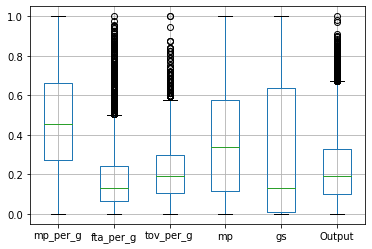

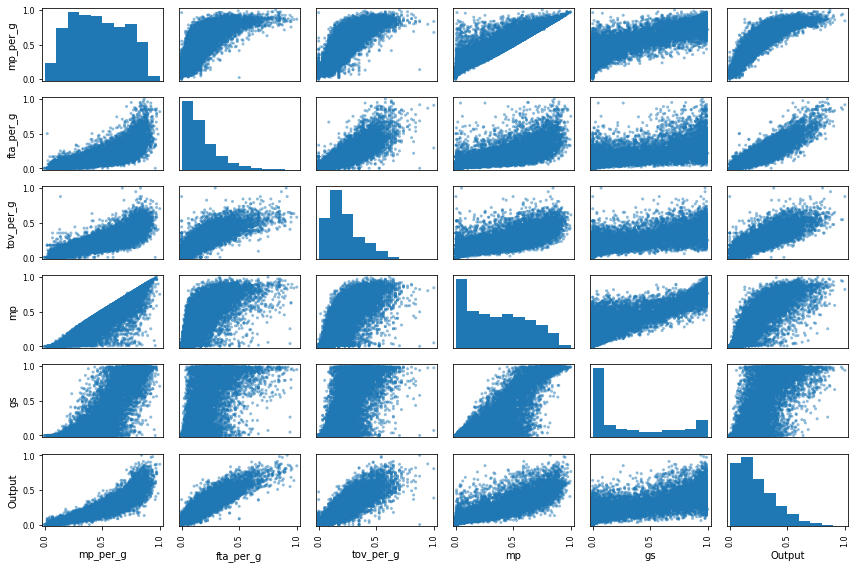

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
#scaler = StandardScaler()
scaler = MinMaxScaler()

Xm_pre_sca = pd.DataFrame(scaler.fit_transform(Xm),columns=Xm.columns)
Xm_pre_sca.boxplot()#grafica de caja
plt.show()
scatter_matrix(Xm_pre_sca, figsize=(12, 8)) #scatter con histogramas
plt.tight_layout()
plt.show()

#Modelo de Regresion Linear Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
steps = [('preproceso',mypre_nba(cat_usr = cat_usr)),
         ('scaler', StandardScaler()),
         ('regresion',LinearRegression())
         ]
metodo_full = Pipeline(steps=steps)
metodo_full.fit(Xtrain,ytrain) #entrena todos los pasos

Pipeline(steps=[('preproceso',
                 mypre_nba(cat_usr={'pos': ['PF', 'C', 'SG', 'PG', 'SF',
                                            'SF-SG', 'PG-SG', 'SG-SF', 'C-PF',
                                            'PF-C', 'SG-PG', 'PF-SF', 'SF-PF',
                                            'SG-PF', 'PG-SF', 'SF-C',
                                            'SG-PG-SF'],
                                    'team_id': ['TOT', 'ATL', 'IND', 'SAS',
                                                'LAL', 'UTA', 'GSW', 'BOS',
                                                'CLE', 'HOU', 'DAL', 'PHO',
                                                'MIL', 'DET', 'LAC', 'POR',
                                                'PHI', 'NYK', 'CHI', 'DEN',
                                                'MIA', 'SAC', 'ORL', 'MIN',
                                                'NJN', 'TOR', 'SEA', 'WAS',
                                                'MEM', 'WSB', ...]})),
        

In [ ]:
ytest_e_standar = metodo_full.predict(Xtest) #se evalua el desempeño en el conjunto de test
print()

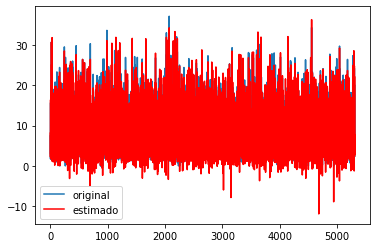

In [ ]:
plt.plot(ytest,label='original')
plt.plot(ytest_e_standar,'r',label='estimado')
plt.legend()
plt.show()

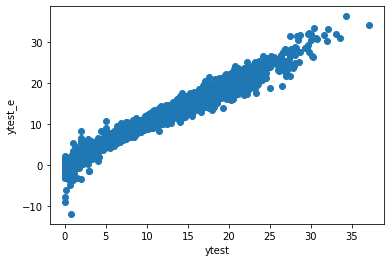

In [ ]:
plt.scatter(ytest,ytest_e_standar)
plt.xlabel('ytest')
plt.ylabel('ytest_e')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_standar = r2_score(ytest,ytest_e_standar)
print('r2 para el modelo MLP', r2_standar)

r2 para el modelo MLP 0.9702193825258145


#Otros modelos de Regresion

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet, SGDRegressor, BayesianRidge

Elastic Net

In [ ]:
steps = [('preproceso',mypre_nba(cat_usr = cat_usr)),
         ('scaler', StandardScaler()),
         ('regresion',ElasticNet())
         ]
metodo_full = Pipeline(steps=steps)
metodo_full.fit(Xtrain,ytrain) #entrena todos los pasos

Pipeline(steps=[('preproceso',
                 mypre_nba(cat_usr={'pos': ['PF', 'C', 'SG', 'PG', 'SF',
                                            'SF-SG', 'PG-SG', 'SG-SF', 'C-PF',
                                            'PF-C', 'SG-PG', 'PF-SF', 'SF-PF',
                                            'SG-PF', 'PG-SF', 'SF-C',
                                            'SG-PG-SF'],
                                    'team_id': ['TOT', 'ATL', 'IND', 'SAS',
                                                'LAL', 'UTA', 'GSW', 'BOS',
                                                'CLE', 'HOU', 'DAL', 'PHO',
                                                'MIL', 'DET', 'LAC', 'POR',
                                                'PHI', 'NYK', 'CHI', 'DEN',
                                                'MIA', 'SAC', 'ORL', 'MIN',
                                                'NJN', 'TOR', 'SEA', 'WAS',
                                                'MEM', 'WSB', ...]})),
        

In [ ]:
ytest_e_elas = metodo_full.predict(Xtest)

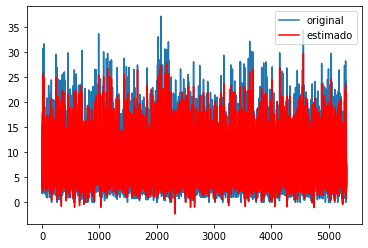

In [ ]:
plt.plot(ytest,label='original')
plt.plot(ytest_e_elas,'r',label='estimado')
plt.legend()
plt.show()

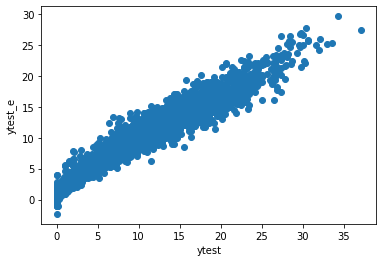

In [ ]:
plt.scatter(ytest,ytest_e_elas)
plt.xlabel('ytest')
plt.ylabel('ytest_e')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_Elas = r2_score(ytest,ytest_e_elas)
print('r2 para el modelo MLP utilizando regresion Elastic Net', r2_Elas)

r2 para el modelo MLP utilizando regresion Elastic Net 0.911574671196817


Lasso

In [ ]:
steps = [('preproceso',mypre_nba(cat_usr = cat_usr)),
         ('scaler', StandardScaler()),
         ('regresion',Lasso())
         ]
metodo_full = Pipeline(steps=steps)
metodo_full.fit(Xtrain,ytrain) #entrena todos los pasos

Pipeline(steps=[('preproceso',
                 mypre_nba(cat_usr={'pos': ['PF', 'C', 'SG', 'PG', 'SF',
                                            'SF-SG', 'PG-SG', 'SG-SF', 'C-PF',
                                            'PF-C', 'SG-PG', 'PF-SF', 'SF-PF',
                                            'SG-PF', 'PG-SF', 'SF-C',
                                            'SG-PG-SF'],
                                    'team_id': ['TOT', 'ATL', 'IND', 'SAS',
                                                'LAL', 'UTA', 'GSW', 'BOS',
                                                'CLE', 'HOU', 'DAL', 'PHO',
                                                'MIL', 'DET', 'LAC', 'POR',
                                                'PHI', 'NYK', 'CHI', 'DEN',
                                                'MIA', 'SAC', 'ORL', 'MIN',
                                                'NJN', 'TOR', 'SEA', 'WAS',
                                                'MEM', 'WSB', ...]})),
        

In [ ]:
ytest_e_lasso = metodo_full.predict(Xtest)

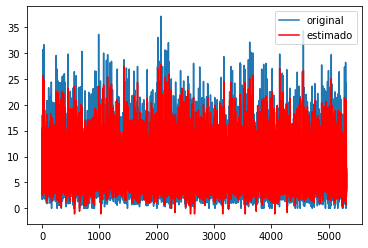

In [ ]:
plt.plot(ytest,label='original')
plt.plot(ytest_e_lasso,'r',label='estimado')
plt.legend()
plt.show()

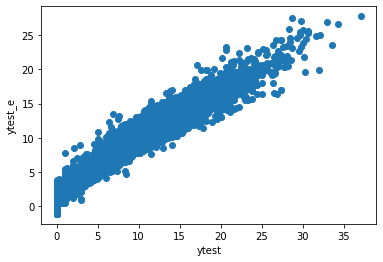

In [ ]:
plt.scatter(ytest,ytest_e_lasso)
plt.xlabel('ytest')
plt.ylabel('ytest_e')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_Lasso = r2_score(ytest,ytest_e_lasso)
print('r2 para el modelo MLP utilizando regresion Lasso', r2_Lasso)

r2 para el modelo MLP utilizando regresion Lasso 0.9014463552205232


SGDRegressor

In [ ]:
steps = [('preproceso',mypre_nba(cat_usr = cat_usr)),
         ('scaler', StandardScaler()),
         ('regresion',SGDRegressor())
         ]
metodo_full = Pipeline(steps=steps)
metodo_full.fit(Xtrain,ytrain) #entrena todos los pasos

Pipeline(steps=[('preproceso',
                 mypre_nba(cat_usr={'pos': ['PF', 'C', 'SG', 'PG', 'SF',
                                            'SF-SG', 'PG-SG', 'SG-SF', 'C-PF',
                                            'PF-C', 'SG-PG', 'PF-SF', 'SF-PF',
                                            'SG-PF', 'PG-SF', 'SF-C',
                                            'SG-PG-SF'],
                                    'team_id': ['TOT', 'ATL', 'IND', 'SAS',
                                                'LAL', 'UTA', 'GSW', 'BOS',
                                                'CLE', 'HOU', 'DAL', 'PHO',
                                                'MIL', 'DET', 'LAC', 'POR',
                                                'PHI', 'NYK', 'CHI', 'DEN',
                                                'MIA', 'SAC', 'ORL', 'MIN',
                                                'NJN', 'TOR', 'SEA', 'WAS',
                                                'MEM', 'WSB', ...]})),
        

In [ ]:
ytest_e_SGD = metodo_full.predict(Xtest)

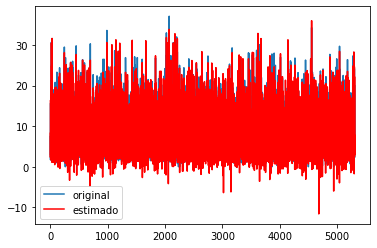

In [ ]:
plt.plot(ytest,label='original')
plt.plot(ytest_e_SGD,'r',label='estimado')
plt.legend()
plt.show()

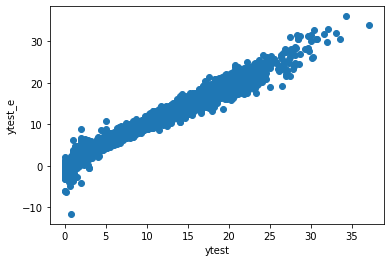

In [ ]:
plt.scatter(ytest,ytest_e_SGD)
plt.xlabel('ytest')
plt.ylabel('ytest_e')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_SGD = r2_score(ytest,ytest_e_SGD)
print('r2 para el modelo MLP utilizando regresion SDGRegressor', r2_SGD)

r2 para el modelo MLP utilizando regresion SDGRegressor 0.9700299166843713


#Analisis con Deep Learning

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train, X_valid, y_train, y_valid = train_test_split(Xtrain_pre, ytrain, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(Xtest_pre)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(25, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1) #se fija una única con activacion lineal por ser regression
])
model.compile(loss='mean_squared_error', optimizer='adam')
history  = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, ytest)

Epoch 1/15
291/291 [==============================] - 2s 4ms/step - loss: 53.4519 - val_loss: 6.2674
Epoch 2/15
291/291 [==============================] - 1s 2ms/step - loss: 3.9577 - val_loss: 2.7824
Epoch 3/15
291/291 [==============================] - 1s 2ms/step - loss: 1.9738 - val_loss: 1.8564
Epoch 4/15
291/291 [==============================] - 1s 2ms/step - loss: 1.2528 - val_loss: 1.2313
Epoch 5/15
291/291 [==============================] - 1s 2ms/step - loss: 0.8355 - val_loss: 0.8605
Epoch 6/15
291/291 [==============================] - 1s 2ms/step - loss: 0.6020 - val_loss: 0.6526
Epoch 7/15
291/291 [==============================] - 1s 2ms/step - loss: 0.4635 - val_loss: 0.5479
Epoch 8/15
291/291 [==============================] - 1s 2ms/step - loss: 0.3814 - val_loss: 0.4592
Epoch 9/15
291/291 [==============================] - 1s 2ms/step - loss: 0.3238 - val_loss: 0.4450
Epoch 10/15
291/291 [==============================] - 1s 2ms/step - loss: 0.2812 - val_loss: 0.392

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                1175      
                                                                 
 dense_1 (Dense)             (None, 10)                260       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,446
Trainable params: 1,446
Non-trainable params: 0
_________________________________________________________________


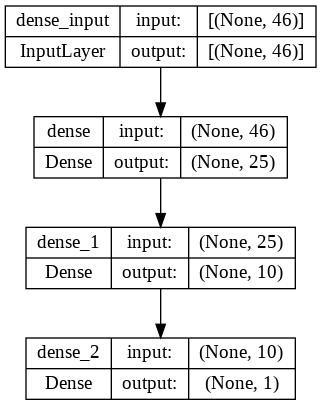

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='NBA_Regression.png', show_shapes=True)#visualizar como esta construido el modelo

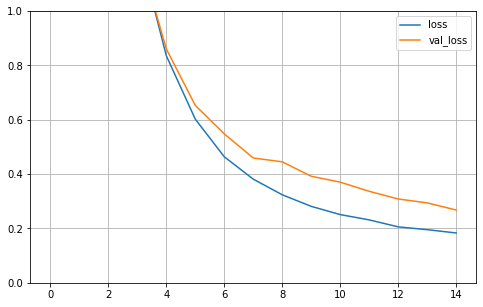

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
predicted_y_DeepL = model.predict(X_test)#se intenta predecir de acuerdo al modelo ya entrenado

166/166 [==============================] - 0s 1ms/step


In [ ]:
ytest

array([15.5,  8.4,  1.7, ...,  3.1,  7.1,  2.4])

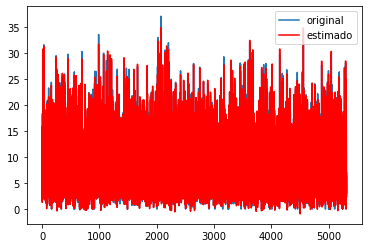

In [ ]:
plt.plot(ytest,label='original')
plt.plot(predicted_y_DeepL,'r',label='estimado')
plt.legend()
plt.show()

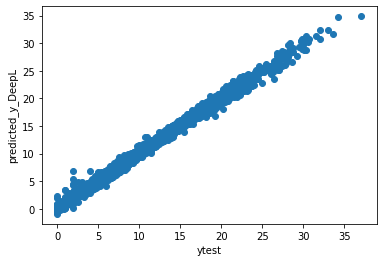

In [ ]:
plt.scatter(ytest,predicted_y_DeepL)
plt.xlabel('ytest')
plt.ylabel('predicted_y_DeepL')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(ytest, predicted_y_DeepL)
print(lin_mae)

0.326105009089531


Mean Absolute Error o Error Medio Absoluto se define como el valor medio de la suma de los valores absolutos de la diferencia entre los valores predichos y los valores reales. Entre se vaya mas a 0, mejor

In [ ]:
from sklearn.metrics import mean_squared_error #se cálcula el ajuste entre las predicciones y los datos usando el mse
lin_mse = mean_squared_error(ytest, predicted_y_DeepL)#porcentaje
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.4500293983247469

In [ ]:
from sklearn.metrics import r2_score
r2_Deep = r2_score(ytest,predicted_y_DeepL)
print('r2 para el modelo MLP', r2_Deep)

r2 para el modelo MLP 0.9945193518053727


Idea: meter iteracion cantidad de epocas e ir guardando en vector el r square, despues plotear y mirar el rendmiento segun epoca

#Comparacion de rendimiento

Text(0.5, 0, 'Metodos de regresion')

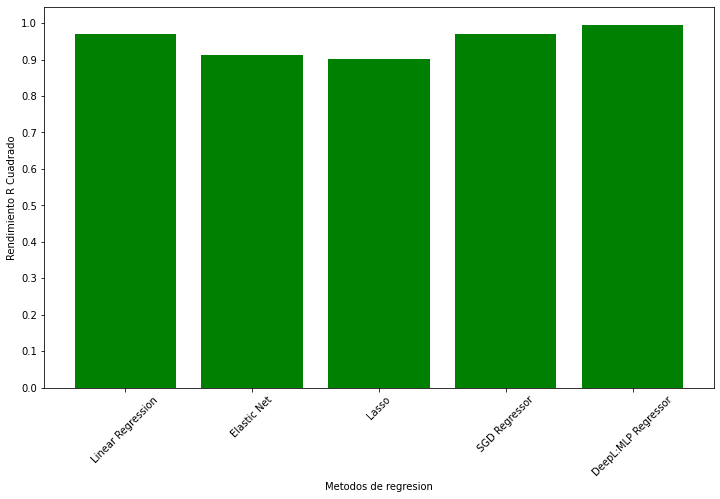

In [ ]:
data = [r2_standar,r2_Elas,r2_Lasso,r2_SGD,r2_Deep]
labels = ["Linear Regression","Elastic Net","Lasso","SGD Regressor","DeepL:MLP Regressor"]

fig,ax = plt.subplots(figsize=(12,7))
ax.bar(labels,data,color="green")
ax.tick_params(axis="x",labelrotation=45)
ax.set_yticks(np.linspace(0,1,11))
ax.set_ylabel("Rendimiento R Cuadrado")
ax.set_xlabel("Metodos de regresion")


Haciendo Acercamiento al establecer un rango de Rendimiento

Text(0.5, 0, 'Metodos de regresion')

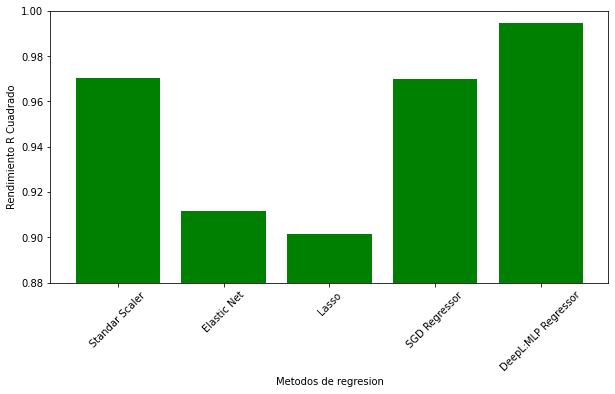

In [ ]:
data = [r2_standar,r2_Elas,r2_Lasso,r2_SGD,r2_Deep]
labels = ["Standar Scaler","Elastic Net","Lasso","SGD Regressor","DeepL:MLP Regressor"]

fig,ax = plt.subplots(figsize=(10,5))
ax.bar(labels,data,color="green")
ax.tick_params(axis="x",labelrotation=45)
ax.set_ylim(0.88,1.0)
ax.set_ylabel("Rendimiento R Cuadrado")
ax.set_xlabel("Metodos de regresion")

#Dashboard Generation

In [ ]:
%%capture
!pip install sweetviz ## Instalamos el paquete

In [ ]:
%%capture
!pip install dataprep ## Instalamos el paquete

In [ ]:
import pandas as pd
import sweetviz as sv
from dataprep.eda import create_report

**Sweetviz**

In [ ]:
reporte = sv.analyze(Xdata) ## Generamos nuestro reporte
reporte.show_html('sweetvizNBA.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report sweetvizNBA.html was generated.


**Dataprep**

In [ ]:
import pandas as pd
from dataprep.eda import create_report

In [ ]:
## Cargamos nuestro dataset
reporte = create_report(Xdata) ## Generamos nuestro reporte
reporte.save("dataprep NBA Database")

Report has been saved to dataprep NBA Database.html!


**Pandas Profiling**

In [ ]:
!pip install pandas-profiling==3.4.0 ## Instalamos el paquete

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Nota: Debido a que si incluimos todos los atributos a un reporte en pandas el archivo html será de 100MB, se elijara solo unos atributos específicos que se relacionan mucho a la variable objetivo

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
subdata = Xdata[['mp_per_g','fta_per_g','tov_per_g',"mp","gs","pts_per_g","vorp","stl_per_g","drb_per_g"]]#tomamos atributos mas comunes

In [ ]:
reporte = ProfileReport(subdata, title="NBA Database Focused ", minimal=False) ## Generamos nuestro reporte
reporte.to_file("pandas_profilingNBA_focused.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
reporte.to_notebook_iframe()

**ATENCIÓN:**Por favor revisar los dashboards descargados en Files y abrir los archivos tipo HTML(en especial Datapred hace un buen análisis con correlaciones e interacciones)